# Token Count Analysis using PySpark
### Course Project – Big Data Analysis
### Dataset: Online Retail II (CSV Format)

This project aims to calculate the **number of tokens (words)** in the `Description` column of the Online Retail dataset using PySpark.  
The token count is computed for each record and aggregated to show the **total tokens per day**.

This notebook demonstrates:
- Data loading using PySpark
- Data cleaning
- Tokenization using `split()` and `size()`
- Date-based grouping
- Saving results to CSV


In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import split, size, col


In [2]:
spark = SparkSession.builder \
    .appName("Token Count Analysis") \
    .getOrCreate()

spark


In [3]:
input_path = "D:/token_count_project/data/online_retail_II_converted.csv"

df = spark.read.option("header", "true").csv(input_path)
df.show(5)


+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|        InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+
| 536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00| 2.55|      17850|United Kingdom|
| 536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00| 3.39|      17850|United Kingdom|
| 536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00| 2.75|      17850|United Kingdom|
| 536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00| 3.39|      17850|United Kingdom|
| 536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00| 3.39|      17850|United Kingdom|
+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+
only showing top 5 rows



In [4]:
df = df.withColumn("InvoiceDate", col("InvoiceDate").substr(1, 10))
df.show(5)


+-------+---------+--------------------+--------+-----------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+-----------+-----+-----------+--------------+
| 536365|   85123A|WHITE HANGING HEA...|       6| 2010-12-01| 2.55|      17850|United Kingdom|
| 536365|    71053| WHITE METAL LANTERN|       6| 2010-12-01| 3.39|      17850|United Kingdom|
| 536365|   84406B|CREAM CUPID HEART...|       8| 2010-12-01| 2.75|      17850|United Kingdom|
| 536365|   84029G|KNITTED UNION FLA...|       6| 2010-12-01| 3.39|      17850|United Kingdom|
| 536365|   84029E|RED WOOLLY HOTTIE...|       6| 2010-12-01| 3.39|      17850|United Kingdom|
+-------+---------+--------------------+--------+-----------+-----+-----------+--------------+
only showing top 5 rows



In [5]:
df = df.withColumn("Tokens", size(split(col("Description"), " ")))
df.select("Description", "Tokens").show(10)


+--------------------+------+
|         Description|Tokens|
+--------------------+------+
|WHITE HANGING HEA...|     5|
| WHITE METAL LANTERN|     3|
|CREAM CUPID HEART...|     5|
|KNITTED UNION FLA...|     6|
|RED WOOLLY HOTTIE...|     5|
|SET 7 BABUSHKA NE...|     5|
|GLASS STAR FROSTE...|     5|
|HAND WARMER UNION...|     4|
|HAND WARMER RED P...|     5|
|JAM MAKING SET WI...|     5|
+--------------------+------+
only showing top 10 rows



In [6]:
result = df.groupBy("InvoiceDate").sum("Tokens")
result.show(50)


+-----------+-----------+
|InvoiceDate|sum(Tokens)|
+-----------+-----------+
| 2010-12-10|      12630|
| 2010-12-01|      14404|
| 2011-01-06|       8404|
| 2010-12-02|       9613|
| 2010-12-12|       6692|
| 2010-12-13|      10643|
| 2010-12-15|       6220|
| 2010-12-16|       8376|
| 2010-12-21|       7235|
| 2011-01-05|       8043|
| 2010-12-14|       9666|
| 2010-12-06|      17795|
| 2010-12-09|      13030|
| 2010-12-08|      12184|
| 2010-12-22|       1384|
| 2010-12-20|       8034|
| 2011-01-07|       8292|
| 2010-12-07|      13510|
| 2010-12-19|       2457|
| 2011-01-04|       5447|
| 2010-12-17|      14286|
| 2010-12-03|       9880|
| 2010-12-05|      12430|
| 2010-12-23|       4483|
| 2011-01-23|       4098|
| 2011-01-27|       7243|
| 2011-01-25|       7724|
| 2011-02-10|       3674|
| 2011-01-30|       3404|
| 2011-02-04|       5590|
| 2011-02-15|       6179|
| 2011-02-06|       1277|
| 2011-02-18|       3961|
| 2011-02-09|       4045|
| 2011-01-19|       6574|
| 2011-02-13

In [10]:
pdf = result.toPandas()

output_path = "D:/token_count_project/output/token_counts_fixed.csv"
pdf.to_csv(output_path, index=False)


print("Saved to:", output_path)


Saved to: D:/token_count_project/output/token_counts_fixed.csv


<Axes: xlabel='InvoiceDate'>

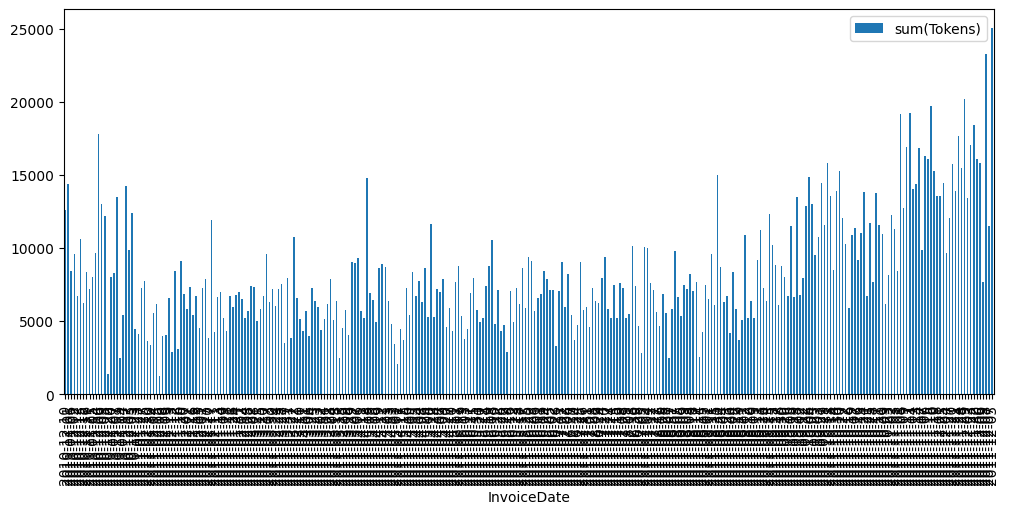

In [11]:
pandas_df = result.toPandas()

pandas_df.plot(kind="bar", x="InvoiceDate", y="sum(Tokens)", figsize=(12,5))


# Conclusion

In this project, we successfully performed token count analysis using PySpark.  
We:
- Loaded a large dataset (Online Retail II)
- Cleaned the `InvoiceDate` column
- Tokenized product descriptions
- Counted tokens per description
- Aggregated token counts per calendar date
- Exported the final results as CSV

This project demonstrates practical use of:
- PySpark SQL
- Text processing
- Distributed aggregation
